# Use Case 2: Comparing Clinical Data

## Step 1: Importing packages and setting up your notebook.

This use case will guide you through accessing and manipulating data from the clinical dataframe. We will explore how to retrieve clinical data, select particular variables for analysis, and represent interactions between those variables in a meaningful way. As before, we will use enometrial cancer data from the Clinical Proteomic Tumor Analysis Consortium, but we will compare FIGO stage--a common measurement of uterine cancer stage (see the <a href="https://www.cancer.org/cancer/endometrial-cancer/detection-diagnosis-staging/staging.html">NIH</a> for more information)--with BMI to see if there is any correllation.

We will start by importing the standard data analysis libraries, plus the seaborn library for visualization.

In [2]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

Our cancer data and a variety of accessory functions are provided in the CPTAC package.

In [3]:
import CPTAC.Endometrial as en

Welcome to the CPTAC data service package. Available datasets may be
viewed using CPTAC.list(). In order to access a specific data set,
import a CPTAC subfolder using either 'import CPTAC.Dataset' or 'from
CPTAC import Dataset'.
******
Version: 0.2.5
******
Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Acetylation Proteomics Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


## Step 2: Getting data

The dataframe for clinical results can be retrieved from CPTAC by calling the <code>CPTAC.get_clinical()</code> method. We can then refine the data by selecting only the variables we are interested in. To see what clinical attributes are available for analysis, we will print out the column names in the clinical dataframe.

In [4]:
clinical_data = en.get_clinical()
print(clinical_data.columns)

Index(['Proteomics_Participant_ID', 'Proteomics_Tumor_Normal', 'Country',
       'Histologic_Grade_FIGO', 'Myometrial_invasion_Specify',
       'Histologic_type', 'Treatment_naive', 'Tumor_purity',
       'Path_Stage_Primary_Tumor-pT', 'Path_Stage_Reg_Lymph_Nodes-pN',
       'Clin_Stage_Dist_Mets-cM', 'Path_Stage_Dist_Mets-pM',
       'tumor_Stage-Pathological', 'FIGO_stage', 'LVSI', 'BMI', 'Age',
       'Diabetes', 'Race', 'Ethnicity', 'Gender', 'Tumor_Site',
       'Tumor_Site_Other', 'Tumor_Focality', 'Tumor_Size_cm',
       'Num_full_term_pregnancies'],
      dtype='object')


For our purposes, we are only interested in FIGO stage and BMI, so we will separate those out from the rest of the dataframe.

In [5]:
fsb = clinical_data[['FIGO_stage', 'BMI']]

Additionally, terms can be defined in context of the data with the <code>CPTAC.define()</code> function. If more information is needed, searching the term online can be helpful. The <code>CPTAC.search()</code> function will open a webpage with the search results for the specified term.

In [6]:
en.define(term='FIGO_stage')
en.define(term='BMI')
#en.search('FIGO_stage') will open a browser search for FIGO_stage

Categorical classification of FIGO state (I being less severe, IV being more severe)
BMI (body mass index) of specified patient.


## Step 3: Organizing the data

For the purposes of this example, we want to organize the FIGO stages solely by their roman numeral numbers. Since the data comes organized with subcategories, we will need to rename them manually.

In [7]:
pd.set_option('mode.chained_assignment', None)
fsb.loc[fsb.FIGO_stage == 'IA', 'FIGO_stage'] = 'I'
fsb.loc[fsb.FIGO_stage == 'IB', 'FIGO_stage'] = 'I'
fsb.loc[fsb.FIGO_stage == 'IIIA', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IIIB', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IIIC1', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IIIC2', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IVB', 'FIGO_stage'] = 'IV'
figo_stage_bmi = fsb.sort_values('FIGO_stage')

## Step 4: Plot the data

Since FIGO stage is categorical, it is easy to visualize each one in a histogram to examine the number of people with each FIGO score who have a given BMI.

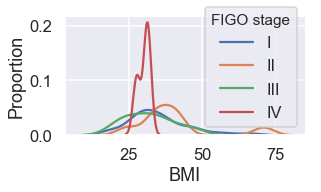

In [8]:
sns.set(style='darkgrid', context="talk")
NUM_COLORS = 12

figoHist = sns.FacetGrid(figo_stage_bmi, hue="FIGO_stage", legend_out=False, aspect=1.5)
figoHist = figoHist.map(sns.kdeplot, "BMI").add_legend(title="FIGO stage")
figoHist.set(ylabel='Proportion')
plt.show()

We can also use a box plot to analyze the data and see if there seems to be any overall correlation between FIGO stage and BMI. In this example, we add a strip plot over the box plot to visualize the underlying data.

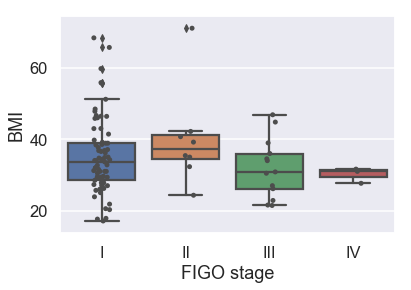

In [9]:
figoStrip = sns.boxplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI")
figoStrip = sns.stripplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI", jitter=True, color=".3")
figoStrip.set(xlabel = "FIGO stage")
plt.show()

## Step 5: Plot other data

The same technique will work for visualizing any other variables in this dataset. As another example, use the following code to create a similar histogram and boxplot to examine the BMI of research subjects compared to diagnosis of diabetes. Once again, we select the variables of interest from the clinical dataframe, then plot the resulting dataframe using the seaborn package.

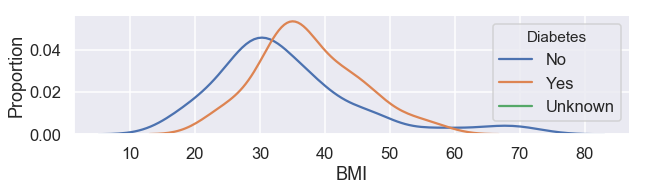

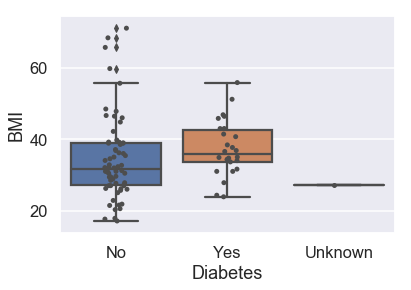

In [11]:
diabetes_bmi = clinical_data[['Diabetes', 'BMI']]

#generate histogram
diabetes_hist = sns.FacetGrid(diabetes_bmi, hue="Diabetes", legend_out=False, aspect=3)
diabetes_hist = diabetes_hist.map(sns.kdeplot, "BMI").add_legend(title="Diabetes")
diabetes_hist.set(ylabel='Proportion')
plt.show()

#generate boxplot 
diabetes_plot = sns.boxplot(data=diabetes_bmi, x="Diabetes", y="BMI")
diabetes_plot = sns.stripplot(data=diabetes_bmi, x="Diabetes", y="BMI", jitter=True, color=".3")
plt.show()